## News Mood
This project analyzes the last five hundred tweets of five major news oulets: BBC World, CBS, CNN, Fox News, and The New York Times. It uses the [Vader Sentiment Analyzer](https://github.com/cjhutto/vaderSentiment), [Tweepy](https://github.com/tweepy/tweepy), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/).

The project contains two helper functions which are defined in "process_tweets.py". Vader analysis is declared and initialized in that file.

In [1]:
import config as cfg
import process_tweets as pt

import datetime
import os
import json

import tweepy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import seaborn as sns

### Initialize Tweepy

In [2]:
auth = tweepy.OAuthHandler(cfg.API_KEY, cfg.API_SECRET)
auth.set_access_token(cfg.ACCESS_TOKEN, cfg.ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

### Initialize the DataFrame
This creates the structure of the data frame and then sets the order of the columns.

In [3]:
tweet_df = pd.DataFrame({
    'Source': '',
    'Text': '',
    'Date': '',
    'Sent.Compound': '',
    'Sent.Positive': '',
    'Sent.Neutral': '',
    'Sent.Negative': ''
}, index=[0])

tweet_df = tweet_df[['Source', 'Text', 'Date', 'Sent.Compound', 'Sent.Positive', 'Sent.Neutral', 'Sent.Negative']]

### Get All the Tweets
This cell loops through the users and then calls retrieve_tweets from the "process_tweets.py" file. All writing to the data frame is handled inside that file.

In [4]:
users = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

for user in users:
    write_rows = [0, 100, 200, 300, 400]
    user_name = '@' + user
    pt.retrieve_tweets(api, user_name, user, tweet_df, write_rows[users.index(user)])

### Write the Data Frame to a CSV

In [5]:
tweet_df.to_csv(os.path.join('csv', 'twitter_moods.csv'))

In [36]:
tweet_df.head()

,Source,Text,Date,Sent.Compound,Sent.Positive,Sent.Neutral,Sent.Negative
0,@BBCWorld,Rhino census begins in India's Kaziranga Natio...,Mon Mar 26 15:38:13 +0000 2018,0,0,1,0
1,@BBCWorld,Facebook faces Federal Trade Commission privac...,Mon Mar 26 15:38:13 +0000 2018,0,0,1,0
2,@BBCWorld,José Filomeno dos Santos named suspect in $500...,Mon Mar 26 15:21:15 +0000 2018,-0.7184,0,0.6,0.4
3,@BBCWorld,RT @BBCNews: UK PM Theresa May says 18 countri...,Mon Mar 26 15:17:51 +0000 2018,0.0516,0.115,0.778,0.107
4,@BBCWorld,Marvia Malik - Pakistan TV airs first transgen...,Mon Mar 26 15:12:30 +0000 2018,0,0,1,0


### Bar Chart 
Each bar represents each outlet's average score over the last five hundred tweets. The goal is to chart whether they were positive, negative, or neutral overall.

In [44]:
bbc_df = tweet_df.loc[tweet_df['Source'] == '@BBCWorld']
cbs_df = tweet_df.loc[tweet_df['Source'] == '@CBSNews']
cnn_df = tweet_df.loc[tweet_df['Source'] == '@CNN']
fox_df = tweet_df.loc[tweet_df['Source'] == '@FoxNews']
nyt_df = tweet_df.loc[tweet_df['Source'] == '@nytimes']

bbc_avg = bbc_df['Sent.Compound'].mean()
cbs_avg = cbs_df['Sent.Compound'].mean()
cnn_avg = cnn_df['Sent.Compound'].mean()
fox_avg = fox_df['Sent.Compound'].mean()
nyt_avg = nyt_df['Sent.Compound'].mean()

(-1.0, 1.0)

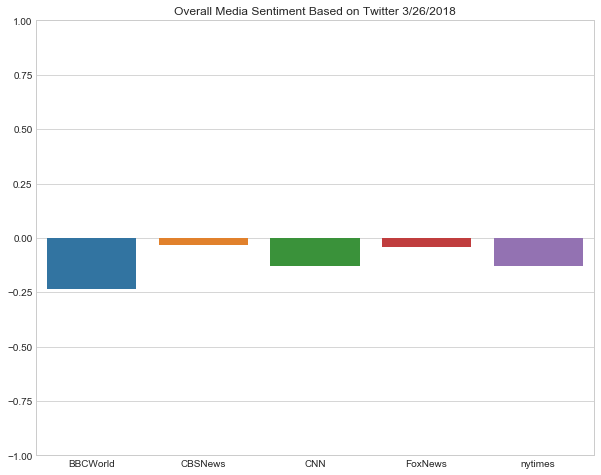

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(users, [bbc_avg, cbs_avg, cnn_avg, fox_avg, nyt_avg])
ax.set_title('Overall Media Sentiment Based on Twitter {}/{}/{}'.format(now.month, now.day, now.year))
ax.set_ylim(-1.0, 1.0)